In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler

In [7]:
airlines = pd.read_csv("D:/DataScience/regression/clustering/EastWestAirlines.csv")

In [8]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [10]:
drop_features = ['ID#', 'Qual_miles'] 
airlines = airlines.drop(drop_features, axis = 1)

In [11]:
airlines.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,1,1,174,1,0,0,7000,0
1,19244,1,1,1,215,2,0,0,6968,0
2,41354,1,1,1,4123,4,0,0,7034,0
3,14776,1,1,1,500,1,0,0,6952,0
4,97752,4,1,1,43300,26,2077,4,6935,1


In [12]:
scaler = StandardScaler() 
airlines_scaled = scaler.fit_transform(airlines)

In [13]:
airlines_normalized = normalize(airlines_scaled)

In [14]:
X_normalized = pd.DataFrame(airlines_normalized)

In [16]:
X_normalized.columns = airlines.columns
X_normalized.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.196021,-0.334383,-0.042686,-0.027272,-0.305362,-0.479718,-0.142779,-0.157363,0.606327,-0.333228
1,-0.238413,-0.340115,-0.043418,-0.027740,-0.309846,-0.441917,-0.145226,-0.160060,0.609871,-0.338939
2,-0.151767,-0.364955,-0.046589,-0.029766,-0.255728,-0.375422,-0.155833,-0.171750,0.669571,-0.363694
3,-0.252374,-0.332687,-0.042470,-0.027134,-0.297976,-0.477284,-0.142054,-0.156564,0.593202,-0.331537
4,0.072753,0.427839,-0.029821,-0.019053,0.328777,0.455135,0.350575,0.210203,0.414029,0.395799


In [18]:
# Building the OPTICS Clustering model 
airlines_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05) 
  
# Training the model 
airlines_model.fit(X_normalized) 

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=10, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [20]:
labels1 = cluster_optics_dbscan(reachability = airlines_model.reachability_,
                                core_distances = airlines_model.core_distances_, 
                                   ordering = airlines_model.ordering_, eps = 0.5) 
  

In [21]:
labels2 = cluster_optics_dbscan(reachability =airlines_model.reachability_, 
                                   core_distances = airlines_model.core_distances_, 
                                   ordering = airlines_model.ordering_, eps = 2) 

In [22]:
space = np.arange(len(X_normalized))

In [23]:
reachability = airlines_model.reachability_[airlines_model.ordering_] 

In [24]:
labels = airlines_model.labels_[airlines_model.ordering_]

In [25]:
print(labels) 

[ 0  0  0 ... -1 -1 -1]


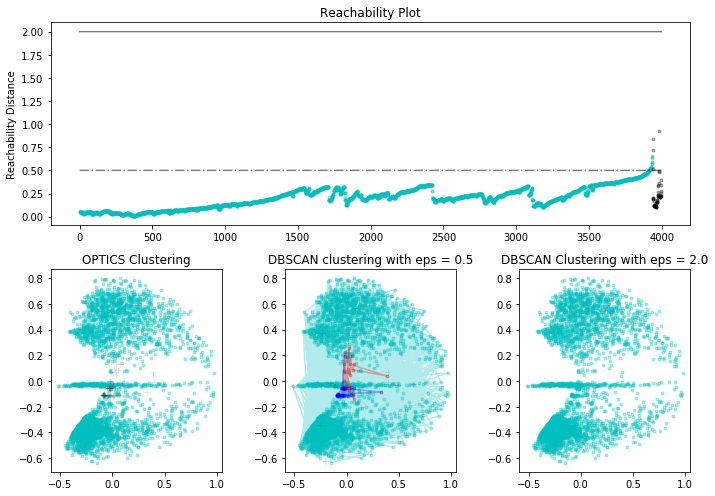

In [33]:

# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 

# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X_normalized[airlines_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X_normalized.iloc[airlines_model.labels_ == -1, 0], 
        X_normalized.iloc[airlines_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X_normalized[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X_normalized.iloc[labels1 == -1, 0], 
        X_normalized.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X_normalized.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X_normalized.iloc[labels2 == -1, 0], 
        X_normalized.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 

plt.tight_layout() 
plt.show() 